C:\Users\dellz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8186 - loss: 0.5090 - val_accuracy: 0.8549 - val_loss: 0.4014
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8626 - loss: 0.3739 - val_accuracy: 0.8648 - val_loss: 0.3733
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8764 - loss: 0.3326 - val_accuracy: 0.8774 - val_loss: 0.3425
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8862 - loss: 0.3071 - val_accuracy: 0.8819 - val_loss: 0.3309
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8916 - loss: 0.2889 - val_accuracy: 0.8865 - val_loss: 0.3215
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8981 - loss: 0.2714 - val_accuracy: 0.8836 - val_loss: 0.3406
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9019 - loss: 0.2598 - val_accuracy: 0.8876 - val_loss: 0.3207
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9065 - loss: 0.2495 - val_accura

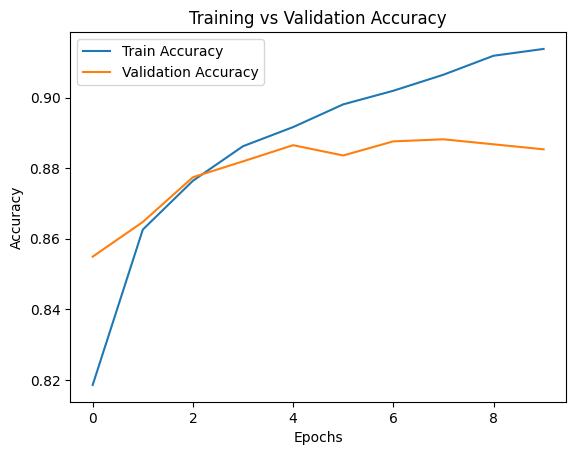

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   


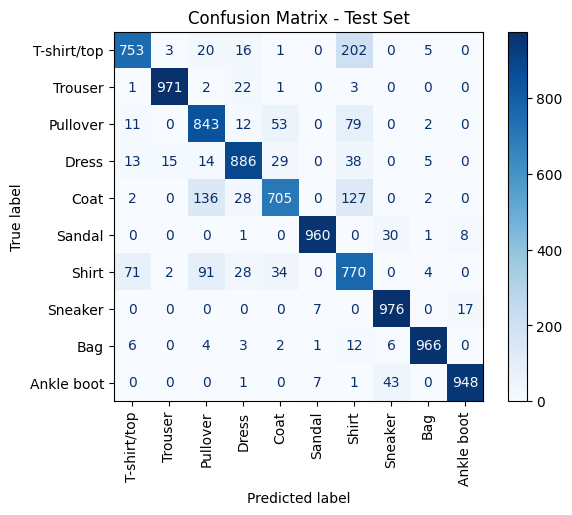

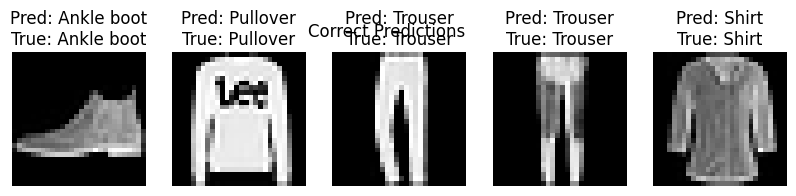

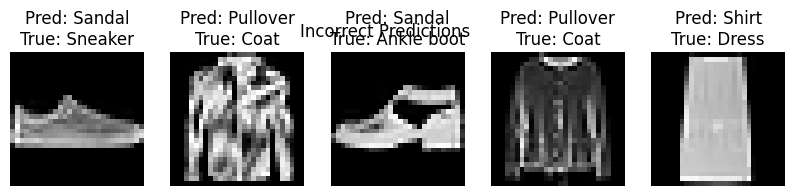

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)), 
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()
correct_examples = []
incorrect_examples = []

for i in range(len(x_test)):
    if len(correct_examples) >= 5 and len(incorrect_examples) >= 5:
        break
    if y_pred[i] == y_test[i] and len(correct_examples) < 5:
        correct_examples.append((x_test[i], y_pred[i], y_test[i]))
    elif y_pred[i] != y_test[i] and len(incorrect_examples) < 5:
        incorrect_examples.append((x_test[i], y_pred[i], y_test[i]))

plt.figure(figsize=(10,2))
for i, (img, pred, label) in enumerate(correct_examples):
    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[label]}")
    plt.axis('off')
plt.suptitle("Correct Predictions")
plt.show()
plt.figure(figsize=(10,2))
for i, (img, pred, label) in enumerate(incorrect_examples):
    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[label]}")
    plt.axis('off')
plt.suptitle("Incorrect Predictions")
plt.show()
